In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def cal_sat_delta_nearest(pop,i,selected_ids,dist,theta=1,lda=1,delta=10):
    tmp_dist = sorted(dist[i,selected_ids])
    sat = 0
    for _ in range(len(selected_ids)):
        if tmp_dist[_]<=delta:
            sat +=  np.exp(-tmp_dist[_] / lda) * pop[i] * (theta**(_))
    return sat

In [4]:
def get_distance_matrix(pop_data,type='l1'):
    '''
    :param pop_data: n entries of row_id,col_id,grid_population
    :param type: distance type, l1, l2, ..
    :return: n * n distance matrix
    '''
    n = pop_data.shape[0]
    dist = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            if type == 'l1':
                dist[i,j] = int(abs(pop_data.x[i]-pop_data.x[j])/0.0083) + \
                            int(abs(pop_data.y[i]-pop_data.y[j])/0.00833)
            else:
                dist[i,j] = np.sqrt((int(abs(pop_data.x[i]-pop_data.x[j])/0.0083))**2 + 
                                    (int(abs(pop_data.y[i]-pop_data.y[j])/0.00833))**2)                
    dist = dist + np.transpose(dist)

    return dist

In [5]:
# load results
filename = '40_theta_5_10.csv'
results = pd.read_csv(filename,header = None)
results

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2162,2186,313,2248,217,727,1875,538,1482,1377,...,359,2245,1423,243,2166,1742,1102,2251,161,927
1,2162,2186,313,2248,217,727,1941,538,1663,627,...,359,1423,1652,242,2211,161,927,524,2251,1102
2,2162,2186,313,2248,217,727,1942,538,1662,627,...,1652,359,2211,242,1423,161,1874,1483,2250,498
3,2162,2186,313,2248,217,1942,727,2107,538,562,...,1652,888,774,2211,293,2250,2006,161,588,421
4,2162,2186,313,2206,216,1942,2248,727,2107,562,...,1561,967,700,2006,2211,588,1661,209,410,2291
5,2162,2186,2207,313,216,2248,1943,2107,727,562,...,700,99,1483,1920,588,2246,940,2007,161,541
6,2162,2186,2207,313,2163,216,2232,2248,498,1942,...,2189,682,1447,588,2246,700,2164,133,1398,2417
7,2162,2207,2186,313,2163,2232,2248,216,498,1943,...,2106,1211,627,2246,658,2316,539,172,1483,1447
8,2162,2161,2207,2186,2163,313,2232,2206,434,2139,...,2291,1875,507,671,1282,2316,209,2164,654,218
9,2162,2161,2208,2163,2207,2186,2160,2232,2106,313,...,2249,2233,562,2164,727,168,1943,256,2209,1282


In [7]:
k = 40
theta_list = [i/10 for i in range(11)]

lda = 5
delta = 10
pop_data = pd.read_csv("sz_pop.csv")
dist = get_distance_matrix(pop_data)

In [9]:
import random
def random_selection(k,pop):
    n = len(pop)
    selected_ids = random.sample(range(n), k)
    return selected_ids
# benchmark 2: top-k pop selection
def top_k_selection(k,pop):
    return sorted(range(len(pop)), key=lambda i: pop[i])[-k:]

In [10]:
# generate a plot of theta VS reward
reward1 = []
reward2 = []
reward3 = []
for j in range(11):
    sat_1 = 0
    theta = theta_list[j]
    for i in range(len(pop_data['pop'])):
        sat_1 += cal_sat_delta_nearest(pop_data['pop'],i,results.iloc[j].tolist(),dist,theta,lda,delta)
    reward1.append(sat_1)

    sat_2 = 0
    selected_2 = random_selection(k,pop_data['pop'])
    for i in range(len(pop_data['pop'])):
        sat_2 += cal_sat_delta_nearest(pop_data['pop'],i,selected_2,dist,theta,lda,delta)
    reward2.append(sat_2)    

    selected_3 = top_k_selection(k,pop_data['pop'])
    sat_3 = 0
    for i in range(len(pop_data['pop'])):
        sat_3 += cal_sat_delta_nearest(pop_data['pop'],i,selected_3,dist,theta,lda,delta)
    reward3.append(sat_3)    
    

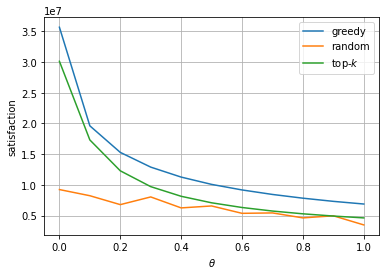

In [12]:
thetas = theta_list[::-1]
plt.plot(thetas, reward1, label = "greedy")
plt.plot(thetas, reward2, label = "random")
plt.plot(thetas, reward3, label = "top-$k$")
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('satisfaction')
plt.grid(True)
plt.savefig('benchmark1_grid.pdf')
#plt.show()

In [13]:
# load results for different lambda
filename = '40_theta_1_10.csv'
r1 = pd.read_csv(filename,header = None)

filename = '40_theta_5_10.csv'
r2 = pd.read_csv(filename,header = None)

filename = '40_theta_10_10.csv'
r3 = pd.read_csv(filename,header = None)

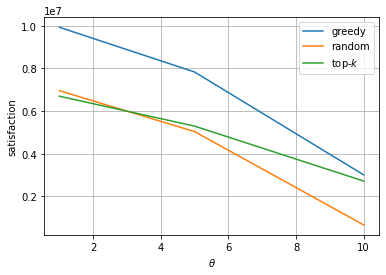

In [14]:
# generate a plot of theta VS reward
reward1 = []
reward2 = []
reward3 = []
theta = 0.2
lda_list = [1,5,10]
selected_1 = [r1.iloc[2],r2.iloc[2],r2.iloc[2]]

for j in range(3):
    sat_1 = 0
    lda = lda_list[j]
    for i in range(len(pop_data['pop'])):
        sat_1 += cal_sat_delta_nearest(pop_data['pop'],i,selected_1[j],dist,theta,lda,delta)
    reward1.append(sat_1)

    sat_2 = 0
    selected_2 = random_selection(k,pop_data['pop'])
    for i in range(len(pop_data['pop'])):
        sat_2 += cal_sat_delta_nearest(pop_data['pop'],i,selected_2,dist,theta,lda,delta)
    reward2.append(sat_2)    

    selected_3 = top_k_selection(k,pop_data['pop'])
    sat_3 = 0
    for i in range(len(pop_data['pop'])):
        sat_3 += cal_sat_delta_nearest(pop_data['pop'],i,selected_3,dist,theta,lda,delta)
    reward3.append(sat_3)    

ldas = lda_list[::-1]
plt.plot(ldas, reward1, label = "greedy")
plt.plot(ldas, reward2, label = "random")
plt.plot(ldas, reward3, label = "top-$k$")
plt.legend()
plt.xlabel('$\\theta$')
plt.ylabel('satisfaction')
#plt.show()
plt.grid(True)
plt.savefig('benchmark2_grid.pdf')    